In [1]:
import numpy as np
from paus_utils import *
from astropy.table import Table
from load_paus_cat import paus_flux_units

from jpasLAEs.utils import mag_to_flux

from LAE_selection_method import *

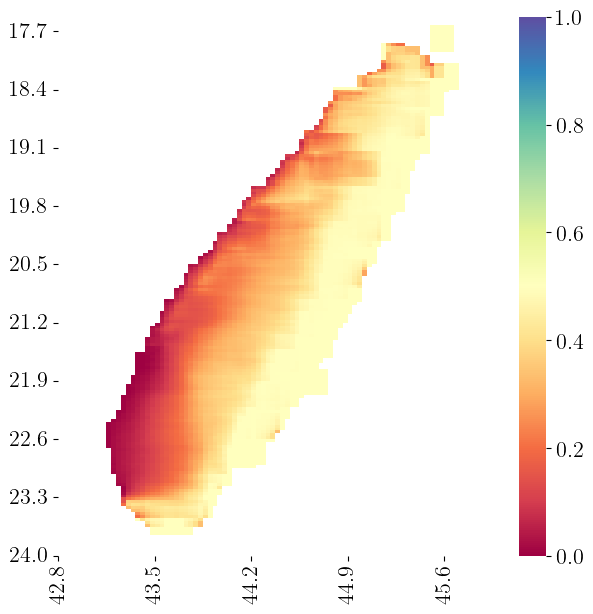

In [2]:
import seaborn as sns

corr_dir = '/home/alberto/almacen/PAUS_data/LF_corrections'
r_bins = np.linspace(17, 24, 200 + 1)
L_bins = np.linspace(40, 47, 200 + 1)
puri2d = np.load(f'{corr_dir}/puri2D_W3_nb0-2.npy')

fig, ax = plt.subplots(figsize=(7, 7))

sns.heatmap(puri2d.T, vmin=0, vmax=1, ax=ax,
            cmap='Spectral', rasterized=True)

yticks = np.arange(len(r_bins))[::20]
ax.set_yticks(yticks)
ax.set_yticklabels(f'{s:0.1f}' for s in r_bins[yticks])

xticks = np.arange(len(L_bins))[::20]
ax.set_xticks(yticks)
ax.set_xticklabels(f'{s:0.1f}' for s in L_bins[xticks])

ax.set(xlim=(80, 170), ylim=(200, 15))

plt.show()

In [3]:
# tab = Table.read('/home/alberto/almacen/PAUS_data/catalogs/EDR_1_v2.fits').to_pandas()

# cat = {} # Initialize catlalog dict

# cat['ref_id'] = np.array(tab['ref_id'])
# cat['photoz'] = np.array(tab['zb'])
# cat['photoz_odds'] = np.array(tab['odds'])
# cat['ra'] = np.array(tab['ra'])
# cat['dec'] = np.array(tab['dec'])
# cat['type'] = np.array(tab['type'])
# cat['zspec'] = np.array(tab['zspec'])
# cat['r_mag'] = np.array(tab['rmag'])

# # Flux units have to be converted to erg s^-1 A^-1
# cat['flx'] = paus_flux_units(tab.to_numpy()[:, 7 : 7 + 40],
#                                 w_central[:-6]).T
# cat['err'] = paus_flux_units(tab.to_numpy()[:, 7 + 40 : 7 + 40 + 40],
#                                 w_central[:-6]).T

# N_sources = len(cat['ref_id'])

# # Add provisional BBs
# cat['flx'] = np.vstack([cat['flx'],
#                         mag_to_flux(tab.to_numpy()[:, -5:].T, w_central[-6:-1].reshape(-1,1)),
#                         np.zeros(N_sources)])
# cat['err'] = np.vstack([cat['err'],
#                         np.zeros((6, N_sources))])

In [4]:
# from load_paus_mocks import load_gal_mock

# def load_this_cat():
#     lc_path = '/home/alberto/almacen/PAUS_data/catalogs/LightCone_mock.fits'
#     cat = load_gal_mock(lc_path)

#     nominal_errs = mag_to_flux(23, w_central) / 3
#     cat['err'] = np.ones_like(cat['flx_0']) * nominal_errs.reshape(-1, 1)
#     cat['flx'] = cat['flx_0'] #+ cat['err'] * np.random.normal(size=cat['flx_0'].shape)
#     # TODO: add_errors function
#     # mock['flx'], mock['err'] = add_errors(mock['flx_0'], field_name)

#     # Compute r_mag
#     cat['r_mag'] = flux_to_mag(cat['flx'][-4], w_central[-4])
#     # tab = Table.read(lc_path).to_pandas().to_numpy()
#     # mock_size = len(tab)

#     # cat_fraction = 0.5 # Load only a fraction of the mock
#     # np.random.seed(1312)
#     # sel = np.random.randint(0, mock_size, size=int(mock_size * cat_fraction))
    
#     # cat = {}

#     # cat['flx'] = mag_to_flux(tab[sel, 11 : 11 + 40],
#     #                                 w_central[:-6]).T

#     # # Add provisional BBs
#     # cat['flx'] = np.vstack([cat['flx'],
#     #                         mag_to_flux(tab[sel, -5:].T,
#     #                                     w_central[-6:-1].reshape(-1,1)),
#     #                         np.zeros(len(sel))])

#     # cat['r_mag'] = flux_to_mag(cat['flx'][-4], w_central[-4])
#     # cat['i_mag'] = flux_to_mag(cat['flx'][-3], w_central[-3])
#     # mag_mask = np.array(cat['r_mag'] < 24) & np.array(cat['i_mag'] < 23)
#     # cat['flx'] = cat['flx'][:, mag_mask]
#     # cat['r_mag'] = cat['r_mag'][mag_mask]

#     # nominal_errs = mag_to_flux(23, w_central) / 3
#     # cat['err'] = np.ones_like(cat['flx']) * nominal_errs.reshape(-1, 1)

#     # # Apply errs
#     # cat['flx'] += cat['err'] * np.random.normal(size=cat['flx'].shape)

#     # cat['zspec'] = np.array(tab[:, 4])[sel][mag_mask]

#     return cat

# cat = load_this_cat()

# N_sources = cat['flx'].shape[1]
# print(f'N_sources = {N_sources}')

In [5]:
# # Load QSO mock
# from load_paus_mocks import add_errors

# qso_mock_name = 'QSO_PAUS_LAES_2'
# qso_mock = pd.read_csv(f'/home/alberto/almacen/Source_cats/{qso_mock_name}/data325350.csv')

# cat = {}

# cat['r_mag'] = flux_to_mag(np.array(qso_mock['r']), w_central[-4])

# # Flux units have to be converted to erg s^-1 A^-1
# cat['flx_0'] = qso_mock.to_numpy()[:, 1 : 1 + 46].T

# field_name = 'W3'
# cat['flx'], cat['err'] = add_errors(cat['flx_0'], field_name, True)

# N_sources = len(cat['r_mag'])
# print(f'N_sources = {N_sources}')

In [14]:
from load_paus_cat import load_paus_cat

field_name = 'W3'
path_to_cat = f'/home/alberto/almacen/PAUS_data/catalogs/PAUS_{field_name}.csv'
cat = load_paus_cat(path_to_cat)

cat['r_mag'] = flux_to_mag(cat['flx'][-4], w_central[-4])

N_sources = len(cat['ref_id'])

In [18]:
from time import time

nb_min, nb_max = 0, 2
print(f'Searching for LAEs at {z_NB(nb_min):0.2f} < z < {z_NB(nb_max):0.2f}')

# Estimate continuum
t0 = time()
cont_est, cont_err = estimate_continuum(cat['flx'], cat['err'],
                                        IGM_T_correct=True, N_nb=6)
print(f'{time() - t0:0.4f}')
t0 = time()
cont_est_other, cont_err_other = estimate_continuum(cat['flx'], cat['err'],
                                                    IGM_T_correct=False,
                                                    N_nb=6)
print(f'{time() - t0:0.4f}')

t0 = time()
# Identify NB excess
is_line = is_there_line(cat['flx'], cat['err'], cont_est, cont_err,
                        ew0min=30)
print(f'{time() - t0:0.4f}')
t0 = time()
lya_lines = identify_lines(is_line, cat['flx'][:40], cont_est, mult_lines=False)
print(f'{time() - t0:0.4f}')
t0 = time()
# Identify NB excess
is_line = is_there_line(cat['flx'], cat['err'], cont_est_other, cont_err_other,
                        ew0min=100, obs=True)
other_lines = identify_lines(is_line, cat['flx'][:40], cont_est_other, mult_lines=True)

# Estimate redshift (z_Arr)
z_Arr = z_NB(lya_lines)

snr = np.empty(N_sources)
for src in range(N_sources):
    l = lya_lines[src]
    snr[src] = cat['flx'][l, src] / cat['err'][l, src]

nb_mask = (lya_lines >= nb_min) & (lya_lines <= nb_max)
snr_mask = (snr >= 6)

nice_lya_mask = snr_mask & nb_mask

t0 = time()
nice_lya, _, _ = nice_lya_select(lya_lines, other_lines, cat['flx'],
                                 z_Arr, mask=nice_lya_mask)
print(f'{time() - t0:0.4f}')
t0 = time()

print(f'N nice_lya = {sum(nice_lya)}')

Searching for LAEs at 2.76 < z < 2.91
15.3661
15.0108
0.6569
9.3066
0.3857
N nice_lya = 49


In [30]:
snr[nice_lya]

array([26.72224934,  8.4799883 ,  6.23927891,  6.61397905,  9.7044363 ,
       12.19380689, 12.11857339, 22.94552329,  7.10504261, 29.56869082,
       18.74393289, 17.79093355,  6.60109407,  7.76732587,  8.24581853,
       12.3624977 ,  7.64883864,  6.66475248, 14.99598155,  6.21956696,
        6.36261324, 13.07780521, 21.14123215, 10.80329063, 12.74108241,
       16.02326048, 25.54298165,  8.03237715, 16.83667969,  7.32976388,
       19.41060061,  7.54426347, 16.36402668,  7.3398126 , 18.86292644,
        7.49002128, 10.33625602, 20.86139578, 10.4318759 ,  6.90148704,
       21.38712558, 10.40697404, 14.9184157 ,  7.20477267, 13.40191863,
       11.83493847, 27.97040648, 31.32169079,  7.60610108])

z_NB = 3.73,  r = 21.85


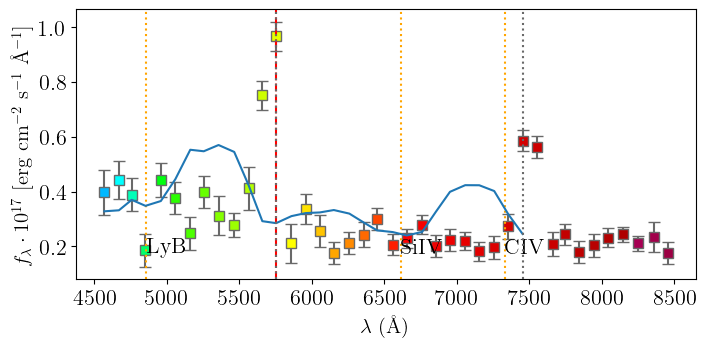

z_NB = 3.50,  r = 22.80


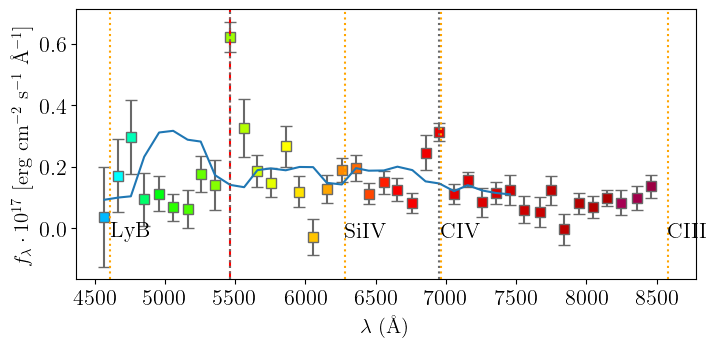

z_NB = 2.76,  r = 21.85


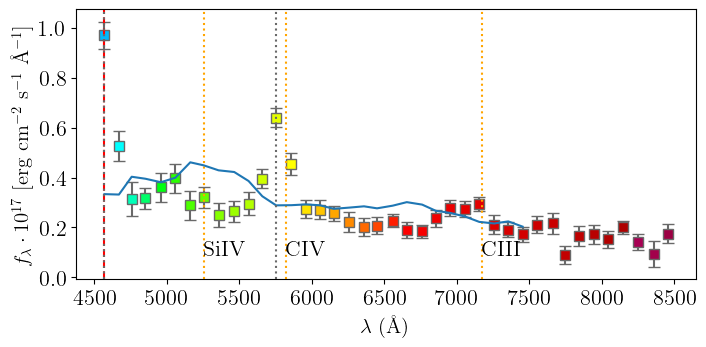

z_NB = 2.84,  r = 20.88


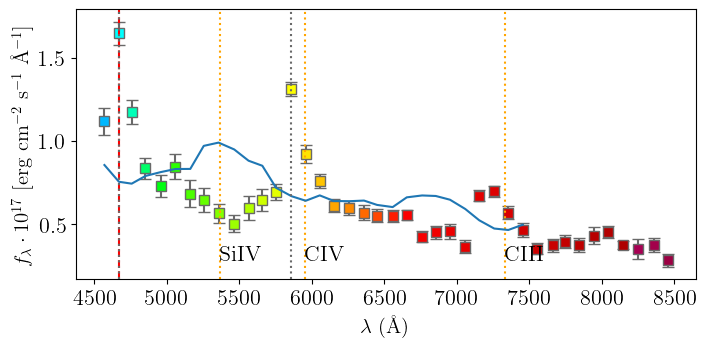

z_NB = 2.84,  r = 21.79


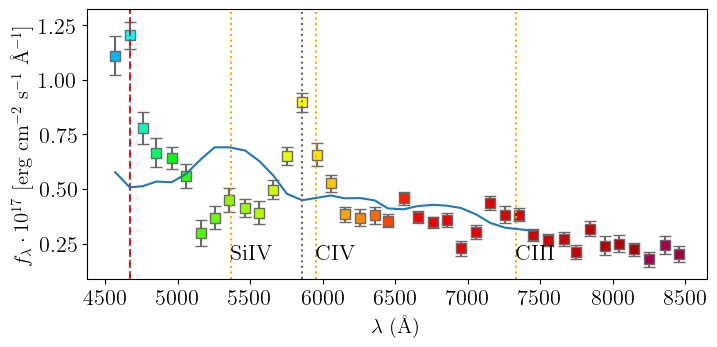

z_NB = 3.32,  r = 22.58


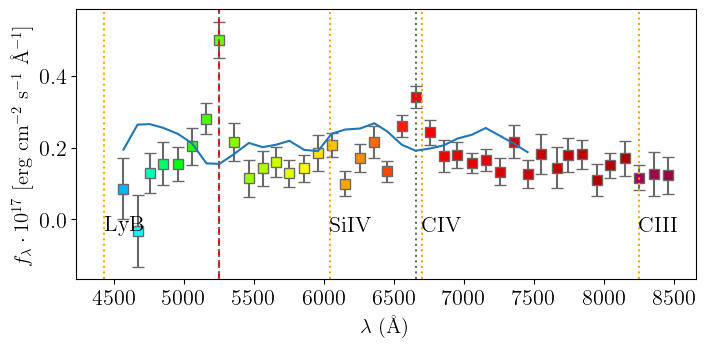

z_NB = 2.99,  r = 22.49


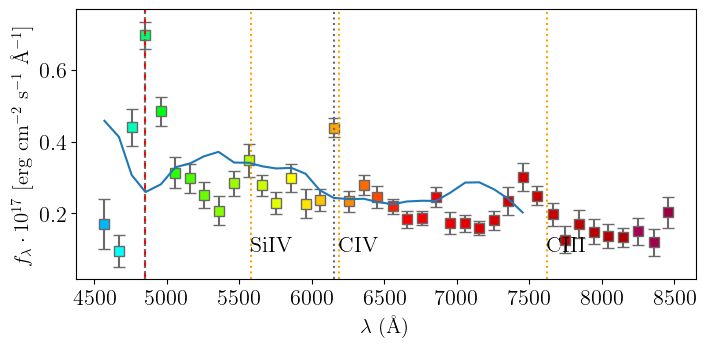

z_NB = 3.50,  r = 21.74


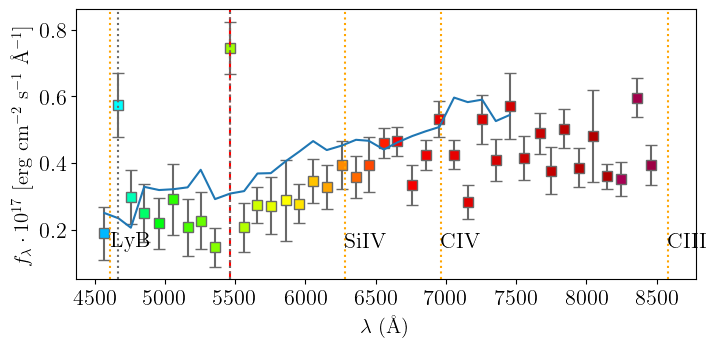

z_NB = 2.91,  r = 22.53


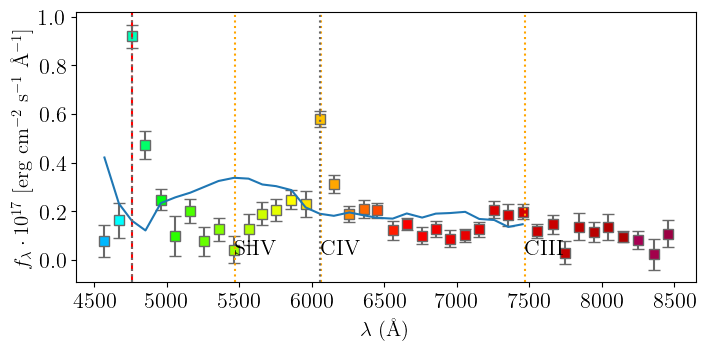

z_NB = 3.41,  r = 23.81


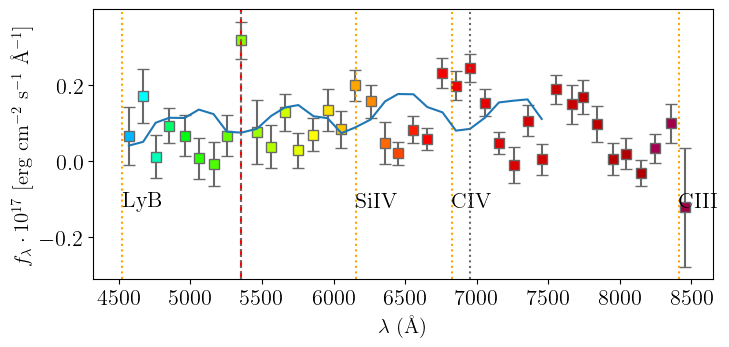

In [8]:
qso_lines = [1025.7220, 1397.61, 1549.48, 1908.73, 2799.12, 2326, 3727]
qso_lines_name = ['LyB', 'SiIV', 'CIV', 'CIII', 'MgII', 'CII', 'OII']

line_dict = {'halpha': 6564.61,
                'hbeta': 4862.68,
                'oii3727': 3727.10,
                'oiii4959': 4960.30,
                'oiii5007': 5008.24}

for name, w in zip(qso_lines_name, qso_lines):
    line_dict[name] = w

selection = nice_lya

for i, src in enumerate(np.random.permutation(np.where(selection)[0])):
    if i == 10:
        break

    print(f'z_NB = {z_Arr[src]:0.2f}, ',
          f'r = {cat["r_mag"][src]:0.2f}',)
        #   f'zspec = {cat["zspec"][src]:0.2f}')

    fig, ax = plt.subplots(figsize=(8, 3.5))

    plot_PAUS_source(cat['flx'][:, src], cat['err'][:, src],
                     ax=ax, plot_BBs=False, set_ylim=False)

    ax.axvline(w_central[lya_lines[src]], ls='--', c='r')

    # Show other detected lines
    for l in other_lines[src]:
        ax.axvline(w_central[l], ls=':', c='dimgray', zorder=99)

    # for name, w in zip(qso_lines_name, qso_lines):
    #     qso_obs_w = w * (1 + z_Arr[src])
    #     if (4400 > qso_obs_w) | (qso_obs_w > 8600):
    #         continue
    #     ax.axvline(qso_obs_w, linestyle=':', color='orange')
    #     ypos = cat['flx'][:40, src].min() * 1e17
    #     ax.text(qso_obs_w, ypos, name, color='k')
    for name, w in line_dict.items():
        obs_w = w * (1 + z_Arr[src])
        if (4400 > obs_w) | (obs_w > 8600):
            continue
        ax.axvline(obs_w, linestyle=':', color='orange')
        ypos = cat['flx'][:40, src].min() * 1e17
        ax.text(obs_w, ypos, name, color='k')

    ax.plot(w_central[:30], cont_est[:30, src] * 1e17)
    
    plt.show()